# Creating a Model for benchmark test
- only 3 classes pizza steak
- 100 images (75 train and 25 test)

In [1]:
import sys
import os
import torch

sys.path.append(os.path.abspath(".."))  # Go up from notebooks/ to project root

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Importing TinyVGG

In [3]:
from models.modelclass.models import TinyVGG

model_0 = TinyVGG(
    input_layer=3,
    hidden_layer=10,
    output_layer=3)

model_0.to(device)


TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout2d(p=0.25, inplace=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7):

# Creating the dataset


In [3]:
from pathlib import Path

data_dir = Path("./pizza_steak_sushi")
train_dir = data_dir/"train"
test_dir = data_dir/"test"

print(train_dir)
print(test_dir)

pizza_steak_sushi\train
pizza_steak_sushi\test


* creating the transform

In [2]:
from torchvision import transforms

mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    # transforms.TrivialAugmentWide(),  # Still lightweight
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


test_transform = transforms.Compose([
    transforms.Resize(size = (224 , 224)),
    transforms.ToTensor(),
    transforms.Normalize(                     # Normalize to ImageNet mean/std
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

print(f"Train transform: {train_transform}")
print(f"Test transform: {test_transform}")

Train transform: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
    ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=None, hue=None)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)
Test transform: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [4]:
from torchvision.datasets import ImageFolder

train_dataset = ImageFolder(
    root = train_dir,
    transform = train_transform   
)

test_dataset = ImageFolder(
    root = test_dir,
    transform = test_transform
)

print(train_dataset)
print(test_dataset)
classes = train_dataset.classes
print(classes)

Dataset ImageFolder
    Number of datapoints: 677
    Root location: pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=None, hue=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Dataset ImageFolder
    Number of datapoints: 192
    Root location: pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
['pizza', 'steak', 'sushi']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


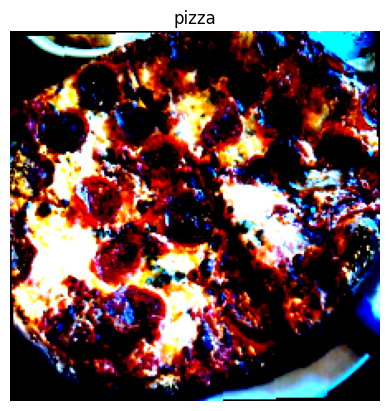

In [7]:
from helper.Visualize import plot_image

image, label = train_dataset[10]

plot_image(image, classes[label])

creating the DataLoader

In [5]:
from torch.utils.data import DataLoader

EPOCHS = 3
BATCH_SIZE = 32


train_dataloader = DataLoader(
    dataset = train_dataset,
    batch_size = BATCH_SIZE,
    num_workers = 0,
    shuffle = True,
    pin_memory = True
)

test_dataloader = DataLoader(
    dataset = test_dataset,
    batch_size = BATCH_SIZE,
    num_workers = 0,
    shuffle = False,
    pin_memory = True
)

In [9]:
print(train_dataloader)
print(test_dataloader)

image, label = next(iter(train_dataloader))
print(image.shape)

torch.Size([32, 3, 224, 224])


# Training the model

In [10]:
from torchinfo import summary

summary(model = model_0 , input_size=(32, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 112, 112]        --
│    └─Conv2d: 2-1                       [32, 10, 224, 224]        280
│    └─BatchNorm2d: 2-2                  [32, 10, 224, 224]        20
│    └─ReLU: 2-3                         [32, 10, 224, 224]        --
│    └─Conv2d: 2-4                       [32, 10, 224, 224]        910
│    └─BatchNorm2d: 2-5                  [32, 10, 224, 224]        20
│    └─ReLU: 2-6                         [32, 10, 224, 224]        --
│    └─MaxPool2d: 2-7                    [32, 10, 112, 112]        --
│    └─Dropout2d: 2-8                    [32, 10, 112, 112]        --
├─Sequential: 1-2                        [32, 10, 56, 56]          --
│    └─Conv2d: 2-9                       [32, 10, 112, 112]        910
│    └─BatchNorm2d: 2-10                 [32, 10, 112, 112]        20
│    └─ReLU:

In [9]:
from torch.optim import Adam
from torch import nn

optimizer = Adam(model_0.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5) # type: ignore


NameError: name 'model_0' is not defined

In [15]:
from helper.Process import run_train_test

results = run_train_test(
    model = model_0,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    scheduler=scheduler,
    device= torch.device(device),
    epochs=30
)


  0%|          | 0/30 [00:00<?, ?it/s]

d:\FoodNet\mlvenv\Lib\site-packages\torch\optim\lr_scheduler.py:198: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch:0	Train Loss:0.7863	Train Acc:0.7153	Test Loss:1.2880	Test Acc:0.5625
Epoch:1	Train Loss:0.8696	Train Acc:0.6764	Test Loss:0.9468	Test Acc:0.5938
Epoch:2	Train Loss:0.7175	Train Acc:0.7054	Test Loss:1.0147	Test Acc:0.5781
Epoch:3	Train Loss:0.7332	Train Acc:0.7114	Test Loss:1.1202	Test Acc:0.6250
Epoch:4	Train Loss:0.9237	Train Acc:0.6608	Test Loss:0.9559	Test Acc:0.6771
Epoch:5	Train Loss:0.7464	Train Acc:0.7423	Test Loss:0.9330	Test Acc:0.6094
Epoch:6	Train Loss:0.6467	Train Acc:0.7446	Test Loss:0.9317	Test Acc:0.6302
Epoch:7	Train Loss:0.6427	Train Acc:0.7372	Test Loss:1.0957	Test Acc:0.6250
Epoch:8	Train Loss:0.6667	Train Acc:0.7349	Test Loss:1.1616	Test Acc:0.5417
Epoch:9	Train Loss:0.6858	Train Acc:0.7295	Test Loss:0.8734	Test Acc:0.6562
Epoch:10	Train Loss:0.6668	Train Acc:0.7418	Test Loss:1.1173	Test Acc:0.5885
Epoch:11	Train Loss:0.8592	Train Acc:0.6855	Test Loss:1.0354	Test Acc:0.6042
Epoch:12	Train Loss:0.6769	Train Acc:0.7210	Test Loss:0.9670	Test Acc:0.6458
Epoch:13	

{'train_loss': [4.695054894143885, 2.3581197315996345, 1.7792770320718938, 2.5034325556321577, 1.737366573377089, 1.0250045142390511, 0.9359245950525458, 0.8563406873833049, 1.1662922501564026, 0.8925785422325134, 1.184892250732942, 1.0268991779197345, 0.9938626235181635, 0.8522511287169023, 0.8327438181096857, 0.7900489311326634, 0.8334508998827501, 0.7165318524295633, 0.7142343670129776, 0.7052209350195798, 0.868758808482777, 0.8128254765814001, 0.9723065536130558, 0.9390757002613761, 0.815343904224309, 0.6979051950302991, 0.6918166117234663, 0.6441804421218958, 0.7150537195530805, 0.6462335396896709], 'train_acc': [0.42357954545454546, 0.5301136363636364, 0.5386363636363636, 0.4946022727272727, 0.5741477272727272, 0.6485795454545454, 0.6190340909090909, 0.6332386363636364, 0.5707386363636364, 0.6380681818181818, 0.6019886363636364, 0.6073863636363637, 0.6147727272727272, 0.6579545454545455, 0.6715909090909091, 0.6659090909090909, 0.6579545454545455, 0.7139204545454546, 0.71761363636

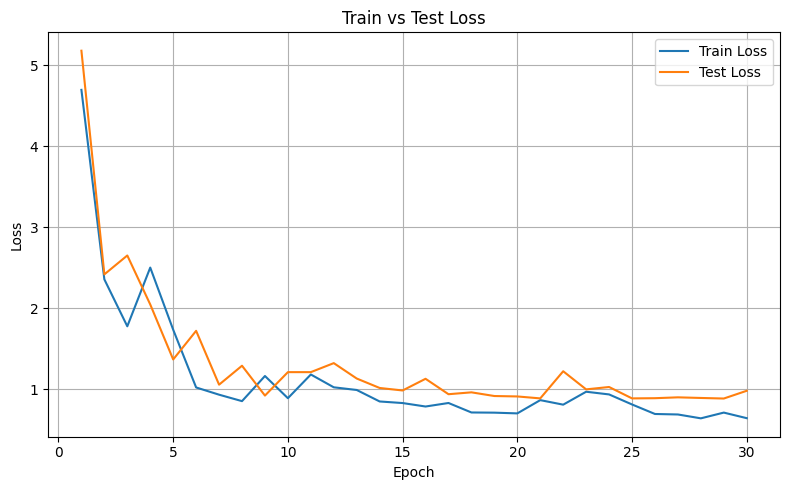

In [ ]:
from helper.Visualize import plot_train_vs_test_loss

print(results)
plot_train_vs_test_loss(results)

In [16]:
def get_model_final_result(result: dict[str ,float])->dict[str, float]:
    model_result = {}
    
    for i in result:
        if i == "time":
            model_result[i] = result[i]
        else:
            model_result[i] = result[i][-1]

    return model_result

model_0_final_results =  get_model_final_result(results)
model_0_final_results

{'train_loss': 0.5286875516176224,
 'train_acc': 0.8005681818181819,
 'test_loss': 0.8747075994809469,
 'test_acc': 0.671875,
 'time': 237.36704969406128}

# Making some predictions

In [17]:
import time


def make_prediction(model: torch.nn.Module, data: tuple, classes: list, device: torch.device):
    """
    Makes a prediction on the given model and data
    Args:
        model: PyTorch model to make prediction
        data: tuple that stores (image tensor, label)
        classes: list containing all the clases
        device: device in which model and tensors are running
    """

    device = torch.device(device)
    model.to(device)

    with torch.inference_mode():
        start = time.time()
        image, label = data
        image = image.unsqueeze(0).to(device)
        
        y_pred_logits = model(image)
        y_pred_probs = torch.softmax(y_pred_logits, dim=1)
        y_pred_class = torch.argmax(y_pred_probs , dim=1)
        end = time.time()
        inference_time = round((end - start) * 1000, 3)

        confidences = {}
        for i, prob in enumerate(y_pred_probs[0].cpu().numpy()):
            confidences[classes[i]] = round(float(prob) * 100, 3)

        return classes[int(y_pred_class.item())], confidences, inference_time
    

# data = train_dataset[80]

# prediction, confidence, inference_time = make_prediction(model_0, data, classes, torch.device(device))
# print(prediction)
# print(confidence)
# print(inference_time)
# plot_image(data[0], classes[data[1]])

correct = 0
wrong = 0
inf_time = 0
for data in test_dataset:
    prediction, conf, inf = make_prediction(model_0, data, classes, torch.device(device))

    if prediction == classes[data[1]]:
        correct += 1
    else:
        wrong += 1
    
    inf_time +=inf

print(f"correct: {correct}")
print(f"Incorrect: {wrong}")
print(f"average inference time: {inf_time/(correct+wrong)}")




correct: 129
Incorrect: 63
average inference time: 1.9443020833333338


# SAVING AND LOADING THE MODEL

* Creating a function to save model

In [13]:
def save_model(model: torch.nn.Module,  metadata: dict, name: str, loc: Path, device: torch.device):
    """
        Saves the model into the desired location along with its metadata
        Args:
            model: model to be saved
            metadata: dictionary that saves relevant info about the mode such as {title, arch, desc, train acc, training images, no. of parameters}
            name: name of the file
            loc: location to save the file
    """
    model.to(device)
    metadata["model_state_dict"] = model.state_dict()
    save_path = loc/f"{name}.pt"

    torch.save(metadata, save_path)
    print(f"model saved at {save_path}")

In [18]:
data = {
    "title": "TinyVGG beta",
    "arch": "Scaled down version of VGG architecture with trivial transform augementation",
    "desc": "A compact and small model that can predict only 3 classes (pizza, steak, sushi)",
    "train accuracy": round(results["train_acc"][-1]*100, 2),
    "training images":len(train_dataset),
    "parameters":sum(p.numel() for p in model_0.parameters())
}
loc = Path("../models")

save_model(model=model_0 , metadata=data, name="pizza_steak_sushi.pth", loc=loc, device=torch.device(device))

model saved at ..\models\pizza_steak_sushi.pth.pt


* Creating a function to load the model

In [ ]:
def load_model(model: torch.nn.Module, checkpoint_path: Path, device: torch.device) -> dict:
    """
    Loads a saved model checkpoint (weights + metadata).

    Args:
        model (torch.nn.Module): An *uninitialized* model instance with the same architecture.
        checkpoint_path (Path): Full path to the `.pt` file.
        device (torch.device): Device to map model and data to (e.g. 'cpu' or 'cuda').

    Returns:
        dict: Metadata dictionary containing training details, metrics, etc.
    """
    if not checkpoint_path.exists():
        raise FileNotFoundError(f"No checkpoint found at {checkpoint_path}")

    checkpoint = torch.load(checkpoint_path, map_location=device)

    # Load model weights
    model.load_state_dict(checkpoint["model_state_dict"])
    model.to(device)
    model.eval()  # Set to evaluation mode

    print(f"[INFO] Model loaded from {checkpoint_path}")

    # Remove state dict from metadata for clarity
    metadata = {k: v for k, v in checkpoint.items() if k != "model_state_dict"}
    return metadata


* Loading the model was a success

In [ ]:
model_1 = TinyVGG(3, 10, 3)
metadata = load_model(model_1, loc/"pizza_steak_sushi.pth.pt", torch.device(device))
metadata

[INFO] Model loaded from ..\models\pizza_steak_sushi.pth.pt


{'train accuracy': 71.62, 'training images': 677, 'parameters': 97173}

In [6]:
from models.modelclass.models import VGG16

model_2 = VGG16(3)
model_2

VGG16(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
   

In [8]:
from torchinfo import summary
summary(model_2, input_size=(32,3, 224,224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG16                                    [32, 3]                   --
├─Sequential: 1-1                        [32, 64, 112, 112]        --
│    └─Conv2d: 2-1                       [32, 64, 224, 224]        1,792
│    └─BatchNorm2d: 2-2                  [32, 64, 224, 224]        128
│    └─ReLU: 2-3                         [32, 64, 224, 224]        --
│    └─Conv2d: 2-4                       [32, 64, 224, 224]        36,928
│    └─BatchNorm2d: 2-5                  [32, 64, 224, 224]        128
│    └─ReLU: 2-6                         [32, 64, 224, 224]        --
│    └─MaxPool2d: 2-7                    [32, 64, 112, 112]        --
├─Sequential: 1-2                        [32, 128, 56, 56]         --
│    └─Conv2d: 2-8                       [32, 128, 112, 112]       73,856
│    └─BatchNorm2d: 2-9                  [32, 128, 112, 112]       256
│    └─ReLU: 2-10                        [32, 128, 112, 112]       --
│

In [10]:
from torch.optim import Adam
from torch import nn

optimizer = Adam(model_2.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5) # type: ignore


In [11]:
from helper.Process import run_train_test

BATCH_SIZE = 32
EPOCHS = 10

results_1 = run_train_test(
    model=model_2,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=EPOCHS,
    device=torch.device(device)
    )

  0%|          | 0/10 [00:00<?, ?it/s]

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
